In [2]:
!pip install easyocr
!pip install imutils

In [3]:
!pip install opencv-python

In [2]:

import cv2


In [10]:
from matplotlib import pyplot as plt


In [19]:
import numpy as np


In [7]:
import imutils

In [8]:
!pip install easyocr
!pip install matplotlib

In [ ]:
import easyocr

In [6]:
img = cv2.imread('image1.jpg')

In [7]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

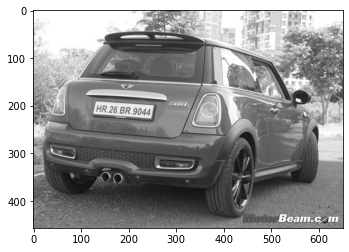

In [11]:
plt.imshow(cv2.cvtColor(gray, cv2.COLOR_BGR2RGB))

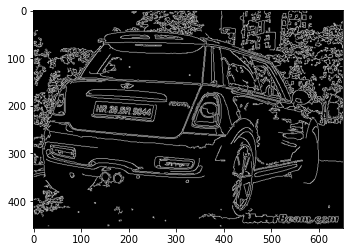

In [12]:
bfilter = cv2.bilateralFilter(gray, 11, 17, 17) #Noise reduction
edged = cv2.Canny(bfilter, 30, 200) #Edge detection
plt.imshow(cv2.cvtColor(edged, cv2.COLOR_BGR2RGB))

In [13]:
!pip install imutils
import imutils

In [14]:
keypoints = cv2.findContours(edged.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

In [15]:
contours = imutils.grab_contours(keypoints)

In [16]:
contours = sorted(contours, key=cv2.contourArea, reverse=True)[:10]

In [17]:
location = None
for contour in contours:
    approx = cv2.approxPolyDP(contour, 10, True)
    if len(approx) == 4:
        location = approx
        break

In [20]:
mask = np.zeros(gray.shape, np.uint8)

In [21]:
new_image = cv2.drawContours(mask, [location], 0,255, -1)

In [22]:
new_image = cv2.bitwise_and(img, img, mask=mask)

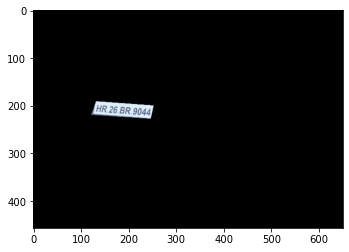

In [23]:
plt.imshow(cv2.cvtColor(new_image, cv2.COLOR_BGR2RGB))

In [24]:
(x,y) = np.where(mask==255)
(x1, y1) = (np.min(x), np.min(y))
(x2, y2) = (np.max(x), np.max(y))
cropped_image = gray[x1:x2+1, y1:y2+1]

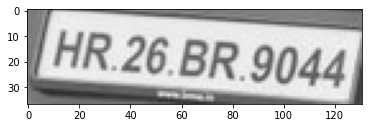

In [25]:
plt.imshow(cv2.cvtColor(cropped_image, cv2.COLOR_BGR2RGB))

In [26]:
import easyocr

In [27]:
reader = easyocr.Reader(['en'])
result = reader.readtext(cropped_image)
result

Neither CUDA nor MPS are available - defaulting to CPU. Note: This module is much faster with a GPU.


[([[6, 4], [128, 4], [128, 34], [6, 34]], 'HR.26 BR.9044', 0.5728024698084409)]

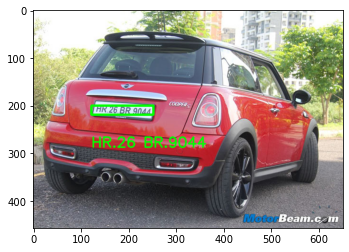

In [28]:
text = result[0][-2]
font = cv2.FONT_HERSHEY_SIMPLEX
res = cv2.putText(img, text=text, org=(approx[0][0][0], approx[1][0][1]+60), fontFace=font, fontScale=1, color=(0,255,0), thickness=2, lineType=cv2.LINE_AA)
res = cv2.rectangle(img, tuple(approx[0][0]), tuple(approx[2][0]), (0,255,0),3)
plt.imshow(cv2.cvtColor(res, cv2.COLOR_BGR2RGB))